In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch
import scipy.stats as ss

In [2]:
def val_extractor(file_name):    
    
    test_accuracy = 0
    sparsity_average = 0
    selectivity_average = 0
    
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy = ast.literal_eval(line)     
            if i == 1:
                sparsity_average = ast.literal_eval(line)
            if i == 3:
                selectivity_average = ast.literal_eval(line)
                
    return test_accuracy, sparsity_average, selectivity_average

In [3]:
# seed 1

# sgd 
acc_sgd_seed1, spar_sgd_seed1, selec_sgd_seed1 = val_extractor('testing/seed1/seed_1_sparsity_selectivity_4_optim_testing_SGD.txt')
# adagrad 
acc_adagrad_seed1, spar_adagrad_seed1, selec_adagrad_seed1 = val_extractor('testing/seed1/seed_1_sparsity_selectivity_4_optim_testing_Adagrad.txt')
# adadelta
acc_adadelta_seed1, spar_adadelta_seed1, selec_adadelta_seed1 = val_extractor('testing/seed1/seed_1_sparsity_selectivity_4_optim_testing_Adadelta.txt')
# adam
acc_adam_seed1, spar_adam_seed1, selec_adam_seed1 = val_extractor('testing/seed1/seed_1_sparsity_selectivity_4_optim_testing_Adam.txt')

In [4]:
# seed 100

# sgd 
acc_sgd_seed2, spar_sgd_seed2, selec_sgd_seed2 = val_extractor('testing/seed100/seed_100_sparsity_selectivity_4_optim_testing_SGD.txt')
# adagrad 
acc_adagrad_seed2, spar_adagrad_seed2, selec_adagrad_seed2 = val_extractor('testing/seed100/seed_100_sparsity_selectivity_4_optim_testing_Adagrad.txt')
# adadelta
acc_adadelta_seed2, spar_adadelta_seed2, selec_adadelta_seed2 = val_extractor('testing/seed100/seed_100_sparsity_selectivity_4_optim_testing_Adadelta.txt')
# adam
acc_adam_seed2, spar_adam_seed2, selec_adam_seed2 = val_extractor('testing/seed100/seed_100_sparsity_selectivity_4_optim_testing_Adam.txt')

In [5]:
# seed 1234

# sgd 
acc_sgd_seed3, spar_sgd_seed3, selec_sgd_seed3 = val_extractor('testing/seed1234/seed_1234_sparsity_selectivity_4_optim_testing_SGD.txt')
# adagrad 
acc_adagrad_seed3, spar_adagrad_seed3, selec_adagrad_seed3 = val_extractor('testing/seed1234/seed_1234_sparsity_selectivity_4_optim_testing_Adagrad.txt')
# adadelta
acc_adadelta_seed3, spar_adadelta_seed3, selec_adadelta_seed3 = val_extractor('testing/seed1234/seed_1234_sparsity_selectivity_4_optim_testing_Adadelta.txt')
# adam
acc_adam_seed3, spar_adam_seed3, selec_adam_seed3 = val_extractor('testing/seed1234/seed_1234_sparsity_selectivity_4_optim_testing_Adam.txt')

In [6]:
def mean_and_se(acc_seed1, acc_seed2, acc_seed3, 
                spar_seed1, spar_seed2, spar_seed3, 
                selec_seed1, selec_seed2, selec_seed3):

    acc_avg = list()
    acc_se  = list()

    spar_avg = list()
    spar_se  = list()

    selec_avg = list()
    selec_se  = list()

    for i in range(len(acc_seed1)):
        acc_avg.append(np.mean([acc_seed1[i], acc_seed2[i], acc_seed3[i]]))
        acc_se .append(np.std ([acc_seed1[i], acc_seed2[i], acc_seed3[i]]) / np.sqrt(3))

        spar_avg.append(np.mean([spar_seed1[i], spar_seed2[i], spar_seed3[i]]))
        spar_se .append(np.std ([spar_seed1[i], spar_seed2[i], spar_seed3[i]]) / np.sqrt(3))

        selec_avg.append(np.mean([selec_seed1[i], selec_seed2[i], selec_seed3[i]]))
        selec_se .append(np.std ([selec_seed1[i], selec_seed2[i], selec_seed3[i]]) / np.sqrt(3))
        
    return acc_avg, acc_se, spar_avg, spar_se, selec_avg, selec_se

In [7]:
# SGD 
sgd_acc_avg, sgd_acc_se, sgd_spar_avg, sgd_spar_se, sgd_selec_avg, sgd_selec_se = mean_and_se(acc_sgd_seed1, acc_sgd_seed2, acc_sgd_seed3, 
                                                                                              spar_sgd_seed1, spar_sgd_seed2, spar_sgd_seed3, 
                                                                                              selec_sgd_seed1, selec_sgd_seed2, selec_sgd_seed3)

# Adagrad
grad_acc_avg, grad_acc_se, grad_spar_avg, grad_spar_se, grad_selec_avg, grad_selec_se = mean_and_se(acc_adagrad_seed1, acc_adagrad_seed2, acc_adagrad_seed3, 
                                                                                                    spar_adagrad_seed1, spar_adagrad_seed2, spar_adagrad_seed3, 
                                                                                                    selec_adagrad_seed1, selec_adagrad_seed2, selec_adagrad_seed3)


# Adadelta 
delta_acc_avg, delta_acc_se, delta_spar_avg, delta_spar_se, delta_selec_avg, delta_selec_se = mean_and_se(acc_adadelta_seed1, acc_adadelta_seed2, acc_adadelta_seed3, 
                                                                                                          spar_adadelta_seed1, spar_adadelta_seed2, spar_adadelta_seed3, 
                                                                                                          selec_adadelta_seed1, selec_adadelta_seed2, selec_adadelta_seed3)

# Adam
adam_acc_avg, adam_acc_se, adam_spar_avg, adam_spar_se, adam_selec_avg, adam_selec_se = mean_and_se(acc_adam_seed1, acc_adam_seed2, acc_adam_seed3, 
                                                                                                    spar_adam_seed1, spar_adam_seed2, spar_adam_seed3, 
                                                                                                    selec_adam_seed1, selec_adam_seed2, selec_adam_seed3)

In [8]:
epoch30 = np.linspace(1, 30, 30)

[]

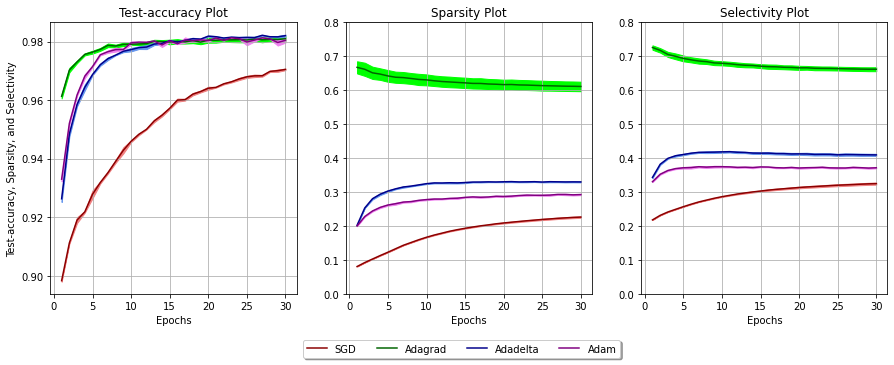

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# Accuracy 
# sgd
ax1.plot(epoch30, sgd_acc_avg, c='darkred', label='SGD')
ax1.fill_between(epoch30, np.subtract(sgd_acc_avg, sgd_acc_se), np.add(sgd_acc_avg, sgd_acc_se), color='lightcoral')

# adagrad
ax1.plot(epoch30, grad_acc_avg, c='darkgreen', label='Adagrad')
ax1.fill_between(epoch30, np.subtract(grad_acc_avg, grad_acc_se), np.add(grad_acc_avg, grad_acc_se), color='lime')

# adadelta
ax1.plot(epoch30, delta_acc_avg, c='darkblue', label='Adadelta')
ax1.fill_between(epoch30, np.subtract(delta_acc_avg, delta_acc_se), np.add(delta_acc_avg, delta_acc_se), color='cornflowerblue')

# adam
ax1.plot(epoch30, adam_acc_avg, c='purple', label='Adam')
ax1.fill_between(epoch30, np.subtract(adam_acc_avg, adam_acc_se), np.add(adam_acc_avg, adam_acc_se), color='violet')

ax1.set_title('Test-accuracy Plot')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Test-accuracy, Sparsity, and Selectivity')
ax1.grid()

# Sparsity 
# sgd
ax2.plot(epoch30, sgd_spar_avg, c='darkred', label='SGD')
ax2.fill_between(epoch30, np.subtract(sgd_spar_avg, sgd_spar_se), np.add(sgd_spar_avg, sgd_spar_se), color='lightcoral')

# adagrad
ax2.plot(epoch30, grad_spar_avg, c='darkgreen', label='Adagrad')
ax2.fill_between(epoch30, np.subtract(grad_spar_avg, grad_spar_se), np.add(grad_spar_avg, grad_spar_se), color='lime')

# adadelta
ax2.plot(epoch30, delta_spar_avg, c='darkblue', label='Adadelta')
ax2.fill_between(epoch30, np.subtract(delta_spar_avg, delta_spar_se), np.add(delta_spar_avg, delta_spar_se), color='cornflowerblue')

# adam
ax2.plot(epoch30, adam_spar_avg, c='purple', label='Adam')
ax2.fill_between(epoch30, np.subtract(adam_spar_avg, adam_spar_se), np.add(adam_spar_avg, adam_spar_se), color='violet')

ax2.set_title('Sparsity Plot')
ax2.set_xlabel('Epochs')
ax2.set_ylim([0, 0.8])
ax2.grid()

# Selectivity 
# sgd
ax3.plot(epoch30, sgd_selec_avg, c='darkred', label='SGD')
ax3.fill_between(epoch30, np.subtract(sgd_selec_avg, sgd_selec_se), np.add(sgd_selec_avg, sgd_selec_se), color='lightcoral')

# adagrad
ax3.plot(epoch30, grad_selec_avg, c='darkgreen', label='Adagrad')
ax3.fill_between(epoch30, np.subtract(grad_selec_avg, grad_selec_se), np.add(grad_selec_avg, grad_selec_se), color='lime')

# adadelta
ax3.plot(epoch30, delta_selec_avg, c='darkblue', label='Adadelta')
ax3.fill_between(epoch30, np.subtract(delta_selec_avg, delta_selec_se), np.add(delta_selec_avg, delta_selec_se), color='cornflowerblue')

# adam
ax3.plot(epoch30, adam_selec_avg, c='purple', label='Adam')
ax3.fill_between(epoch30, np.subtract(adam_selec_avg, adam_selec_se), np.add(adam_selec_avg, adam_selec_se), color='violet')

ax3.set_title('Selectivity Plot')
ax3.set_xlabel('Epochs')
ax3.set_ylim([0, 0.8])
ax3.grid()

ax3.legend(loc='upper center', bbox_to_anchor=(-0.73, -0.15),
          fancybox=True, shadow=True, ncol=4)

plt.plot()

# Accuracy vs Sparsity, Selectivity 

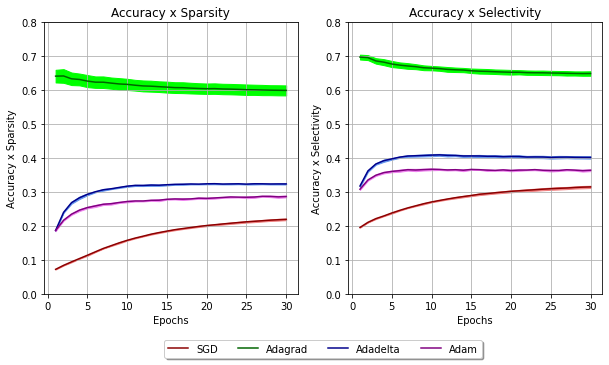

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Sparsity 
ax1.plot(epoch30, np.multiply(sgd_acc_avg, sgd_spar_avg), c='darkred', label='SGD')
ax1.fill_between(epoch30, np.subtract(np.multiply(sgd_acc_avg, sgd_spar_avg), np.add(sgd_acc_se, sgd_spar_se)), np.add(np.multiply(sgd_acc_avg, sgd_spar_avg), np.add(sgd_acc_se, sgd_spar_se)), color='lightcoral')

ax1.plot(epoch30, np.multiply(grad_acc_avg, grad_spar_avg), c='darkgreen', label='Adagrad')
ax1.fill_between(epoch30, np.subtract(np.multiply(grad_acc_avg, grad_spar_avg), np.add(grad_acc_se, grad_spar_se)), np.add(np.multiply(grad_acc_avg, grad_spar_avg), np.add(grad_acc_se, grad_spar_se)), color='lime')

ax1.plot(epoch30, np.multiply(delta_acc_avg, delta_spar_avg), c='darkblue', label='Adadelta')
ax1.fill_between(epoch30, np.subtract(np.multiply(delta_acc_avg, delta_spar_avg), np.add(delta_acc_se, delta_spar_se)), np.add(np.multiply(delta_acc_avg, delta_spar_avg), np.add(delta_acc_se, delta_spar_se)), color='cornflowerblue')

ax1.plot(epoch30, np.multiply(adam_acc_avg, adam_spar_avg), c='purple', label='Adam')
ax1.fill_between(epoch30, np.subtract(np.multiply(adam_acc_avg, adam_spar_avg), np.add(adam_acc_se, adam_spar_se)), np.add(np.multiply(adam_acc_avg, adam_spar_avg), np.add(adam_acc_se, adam_spar_se)), color='violet')

# Selectivity 
ax2.plot(epoch30, np.multiply(sgd_acc_avg, sgd_selec_avg), c='darkred', label='SGD')
ax2.fill_between(epoch30, np.subtract(np.multiply(sgd_acc_avg, sgd_selec_avg), np.add(sgd_acc_se, sgd_selec_se)), np.add(np.multiply(sgd_acc_avg, sgd_selec_avg), np.add(sgd_acc_se, sgd_selec_se)), color='lightcoral')

ax2.plot(epoch30, np.multiply(grad_acc_avg, grad_selec_avg), c='darkgreen', label='Adagrad')
ax2.fill_between(epoch30, np.subtract(np.multiply(grad_acc_avg, grad_selec_avg), np.add(grad_acc_se, grad_selec_se)), np.add(np.multiply(grad_acc_avg, grad_selec_avg), np.add(grad_acc_se, grad_selec_se)), color='lime')

ax2.plot(epoch30, np.multiply(delta_acc_avg, delta_selec_avg), c='darkblue', label='Adadelta')
ax2.fill_between(epoch30, np.subtract(np.multiply(delta_acc_avg, delta_selec_avg), np.add(delta_acc_se, delta_selec_se)), np.add(np.multiply(delta_acc_avg, delta_selec_avg), np.add(delta_acc_se, delta_selec_se)), color='cornflowerblue')

ax2.plot(epoch30, np.multiply(adam_acc_avg, adam_selec_avg), c='purple', label='Adam')
ax2.fill_between(epoch30, np.subtract(np.multiply(adam_acc_avg, adam_selec_avg), np.add(adam_acc_se, adam_selec_se)), np.add(np.multiply(adam_acc_avg, adam_selec_avg), np.add(adam_acc_se, adam_selec_se)), color='violet')

ax1.set_title('Accuracy x Sparsity')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy x Sparsity')
ax1.set_ylim([0, 0.8])
ax1.grid()

ax2.set_title('Accuracy x Selectivity')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy x Selectivity')
ax2.set_ylim([0, 0.8])
ax2.grid()

ax2.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          fancybox=True, shadow=True, ncol=4)

# Train vs Test

In [34]:
# seed 1

# sgd 
train_acc_sgd_seed1, train_spar_sgd_seed1, train_selec_sgd_seed1 = val_extractor('training/seed1/seed_1_sparsity_selectivity_4_optim_training_SGD.txt')
# adagrad 
train_acc_adagrad_seed1, train_spar_adagrad_seed1, train_selec_adagrad_seed1 = val_extractor('training/seed1/seed_1_sparsity_selectivity_4_optim_training_Adagrad.txt')
# adadelta
train_acc_adadelta_seed1, train_spar_adadelta_seed1, train_selec_adadelta_seed1 = val_extractor('training/seed1/seed_1_sparsity_selectivity_4_optim_training_Adadelta.txt')
# adam
train_acc_adam_seed1, train_spar_adam_seed1, train_selec_adam_seed1 = val_extractor('training/seed1/seed_1_sparsity_selectivity_4_optim_training_Adam.txt')

In [35]:
# seed 100

# sgd 
train_acc_sgd_seed2, train_spar_sgd_seed2, train_selec_sgd_seed2 = val_extractor('training/seed100/seed_100_sparsity_selectivity_4_optim_training_SGD.txt')
# adagrad 
train_acc_adagrad_seed2, train_spar_adagrad_seed2, train_selec_adagrad_seed2 = val_extractor('training/seed100/seed_100_sparsity_selectivity_4_optim_training_Adagrad.txt')
# adadelta
train_acc_adadelta_seed2, train_spar_adadelta_seed2, train_selec_adadelta_seed2 = val_extractor('training/seed100/seed_100_sparsity_selectivity_4_optim_training_Adadelta.txt')
# adam
train_acc_adam_seed2, train_spar_adam_seed2, train_selec_adam_seed2 = val_extractor('training/seed100/seed_100_sparsity_selectivity_4_optim_training_Adam.txt')

In [36]:
# seed 1234

# sgd 
train_acc_sgd_seed3, train_spar_sgd_seed3, train_selec_sgd_seed3 = val_extractor('training/seed1234/seed_1234_sparsity_selectivity_4_optim_training_SGD.txt')
# adagrad 
train_acc_adagrad_seed3, train_spar_adagrad_seed3, train_selec_adagrad_seed3 = val_extractor('training/seed1234/seed_1234_sparsity_selectivity_4_optim_training_Adagrad.txt')
# adadelta
train_acc_adadelta_seed3, train_spar_adadelta_seed3, train_selec_adadelta_seed3 = val_extractor('training/seed1234/seed_1234_sparsity_selectivity_4_optim_training_Adadelta.txt')
# adam
train_acc_adam_seed3, train_spar_adam_seed3, train_selec_adam_seed3 = val_extractor('training/seed1234/seed_1234_sparsity_selectivity_4_optim_training_Adam.txt')

In [37]:
# SGD 
train_sgd_acc_avg, train_sgd_acc_se, train_sgd_spar_avg, train_sgd_spar_se, train_sgd_selec_avg, train_sgd_selec_se = mean_and_se(train_acc_sgd_seed1, train_acc_sgd_seed2, train_acc_sgd_seed3, 
                                                                                              train_spar_sgd_seed1, train_spar_sgd_seed2, train_spar_sgd_seed3, 
                                                                                              train_selec_sgd_seed1, train_selec_sgd_seed2, train_selec_sgd_seed3)

# Adagrad
train_grad_acc_avg, train_grad_acc_se, train_grad_spar_avg, train_grad_spar_se, train_grad_selec_avg, train_grad_selec_se = mean_and_se(train_acc_adagrad_seed1, train_acc_adagrad_seed2, train_acc_adagrad_seed3, 
                                                                                                    train_spar_adagrad_seed1, train_spar_adagrad_seed2, train_spar_adagrad_seed3, 
                                                                                                    train_selec_adagrad_seed1, train_selec_adagrad_seed2, train_selec_adagrad_seed3)


# Adadelta 
train_delta_acc_avg, train_delta_acc_se, train_delta_spar_avg, train_delta_spar_se, train_delta_selec_avg, train_delta_selec_se = mean_and_se(train_acc_adadelta_seed1, train_acc_adadelta_seed2, train_acc_adadelta_seed3, 
                                                                                                          train_spar_adadelta_seed1, train_spar_adadelta_seed2, train_spar_adadelta_seed3, 
                                                                                                          train_selec_adadelta_seed1, train_selec_adadelta_seed2, train_selec_adadelta_seed3)

# Adam
train_adam_acc_avg, train_adam_acc_se, train_adam_spar_avg, train_adam_spar_se, train_adam_selec_avg, train_adam_selec_se = mean_and_se(train_acc_adam_seed1, train_acc_adam_seed2, train_acc_adam_seed3, 
                                                                                                    train_spar_adam_seed1, train_spar_adam_seed2, train_spar_adam_seed3, 
                                                                                                    train_selec_adam_seed1, train_selec_adam_seed2, train_selec_adam_seed3)

[]

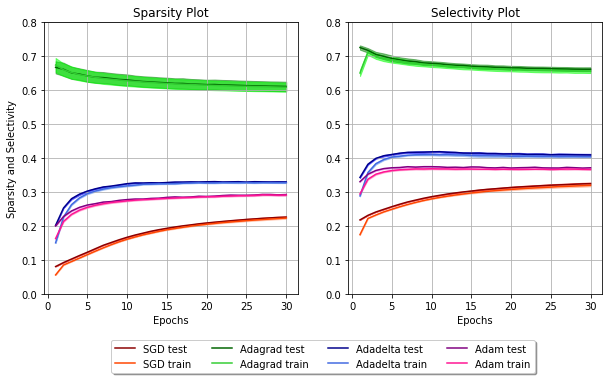

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Sparsity 
# sgd
# test
ax1.plot(epoch30, sgd_spar_avg, c='darkred', label='SGD test')
ax1.fill_between(epoch30, np.subtract(sgd_spar_avg, sgd_spar_se), np.add(sgd_spar_avg, sgd_spar_se), color='red', alpha=0.5)
# train
ax1.plot(epoch30, train_sgd_spar_avg, c='orangered', label='SGD train')
ax1.fill_between(epoch30, np.subtract(train_sgd_spar_avg, train_sgd_spar_se), np.add(train_sgd_spar_avg, train_sgd_spar_se), color='lightsalmon', alpha=0.5)


# adagrad
# test
ax1.plot(epoch30, grad_spar_avg, c='darkgreen', label='Adagrad test')
ax1.fill_between(epoch30, np.subtract(grad_spar_avg, grad_spar_se), np.add(grad_spar_avg, grad_spar_se), color='green', alpha=0.5)

ax1.plot(epoch30, train_grad_spar_avg, c='limegreen', label='Adagrad train')
ax1.fill_between(epoch30, np.subtract(train_grad_spar_avg, train_grad_spar_se), np.add(train_grad_spar_avg, train_grad_spar_se), color='lime', alpha=0.5)


# adadelta
# test
ax1.plot(epoch30, delta_spar_avg, c='darkblue', label='Adadelta test')
ax1.fill_between(epoch30, np.subtract(delta_spar_avg, delta_spar_se), np.add(delta_spar_avg, delta_spar_se), color='blue', alpha=0.5)
# train
ax1.plot(epoch30, train_delta_spar_avg, c='royalblue', label='Adadelta train')
ax1.fill_between(epoch30, np.subtract(train_delta_spar_avg, train_delta_spar_se), np.add(train_delta_spar_avg, train_delta_spar_se), color='cornflowerblue', alpha=0.5)


# adam
# test
ax1.plot(epoch30, adam_spar_avg, c='purple', label='Adam test')
ax1.fill_between(epoch30, np.subtract(adam_spar_avg, adam_spar_se), np.add(adam_spar_avg, adam_spar_se), color='violet', alpha=0.5)
# train
ax1.plot(epoch30, train_adam_spar_avg, c='deeppink', label='Adam train')
ax1.fill_between(epoch30, np.subtract(train_adam_spar_avg, train_adam_spar_se), np.add(train_adam_spar_avg, train_adam_spar_se), color='hotpink', alpha=0.5)


ax1.set_title('Sparsity Plot')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Sparsity and Selectivity')
ax1.set_ylim([0, 0.8])
ax1.grid()

# Selectivity 
# sgd
ax2.plot(epoch30, sgd_selec_avg, c='darkred', label='SGD test')
ax2.fill_between(epoch30, np.subtract(sgd_selec_avg, sgd_selec_se), np.add(sgd_selec_avg, sgd_selec_se), color='red', alpha=0.5)
# train
ax2.plot(epoch30, train_sgd_selec_avg, c='orangered', label='SGD train')
ax2.fill_between(epoch30, np.subtract(train_sgd_selec_avg, train_sgd_selec_se), np.add(train_sgd_selec_avg, train_sgd_selec_se), color='lightsalmon', alpha=0.5)

# adagrad
ax2.plot(epoch30, grad_selec_avg, c='darkgreen', label='Adagrad test')
ax2.fill_between(epoch30, np.subtract(grad_selec_avg, grad_selec_se), np.add(grad_selec_avg, grad_selec_se), color='green', alpha=0.5)
# train
ax2.plot(epoch30, train_grad_selec_avg, c='limegreen', label='Adagrad train')
ax2.fill_between(epoch30, np.subtract(train_grad_selec_avg, train_grad_selec_se), np.add(train_grad_selec_avg, train_grad_selec_se), color='lime', alpha=0.5)

# adadelta
ax2.plot(epoch30, delta_selec_avg, c='darkblue', label='Adadelta test')
ax2.fill_between(epoch30, np.subtract(delta_selec_avg, delta_selec_se), np.add(delta_selec_avg, delta_selec_se), color='blue', alpha=0.5)
# train
ax2.plot(epoch30, train_delta_selec_avg, c='royalblue', label='Adadelta train')
ax2.fill_between(epoch30, np.subtract(train_delta_selec_avg, train_delta_selec_se), np.add(train_delta_selec_avg, train_delta_selec_se), color='cornflowerblue', alpha=0.5)

# adam
ax2.plot(epoch30, adam_selec_avg, c='purple', label='Adam test')
ax2.fill_between(epoch30, np.subtract(adam_selec_avg, adam_selec_se), np.add(adam_selec_avg, adam_selec_se), color='violet', alpha=0.5)
# train
ax2.plot(epoch30, train_adam_selec_avg, c='deeppink', label='Adam train')
ax2.fill_between(epoch30, np.subtract(train_adam_selec_avg, train_adam_selec_se), np.add(train_adam_selec_avg, train_adam_selec_se), color='hotpink', alpha=0.5)


ax2.set_title('Selectivity Plot')
ax2.set_xlabel('Epochs')
ax2.set_ylim([0, 0.8])
ax2.grid()

ax2.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          fancybox=True, shadow=True, ncol=4)

plt.plot()

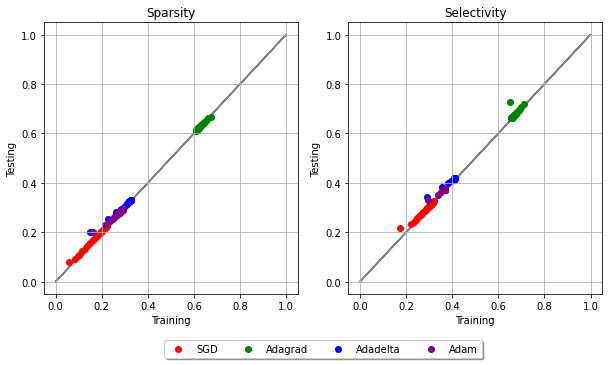

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
ax1.scatter(train_sgd_spar_avg, sgd_spar_avg, c='red')
ax1.scatter(train_grad_spar_avg, grad_spar_avg, c='green')
ax1.scatter(train_delta_spar_avg, delta_spar_avg, c='blue')
ax1.scatter(train_adam_spar_avg, adam_spar_avg, c='purple')
ax1.set_xlabel('Training')
ax1.set_ylabel('Testing')
ax1.set_title('Sparsity')
ax1.grid()


ax2.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
ax2.scatter(train_sgd_selec_avg, sgd_selec_avg, c='red', label='SGD')
ax2.scatter(train_grad_selec_avg, grad_selec_avg, c='green', label='Adagrad')
ax2.scatter(train_delta_selec_avg, delta_selec_avg, c='blue', label='Adadelta')
ax2.scatter(train_adam_selec_avg, adam_selec_avg, c='purple', label='Adam')
ax2.set_xlabel('Training')
ax2.set_ylabel('Testing')
ax2.set_title('Selectivity')

ax2.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          fancybox=True, shadow=True, ncol=4)

ax2.grid()